<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_preditivos_classicos/blob/main/3.Exercicio%20KNN_random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos preditivos clássicos**

Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

# Estratégias de Treinamento - Exercício

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Usando o algoritmo PCA para diminuir a dimensionalidade



1.   Gere uma base de dados com make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)
4.   Faça a separação em treino e teste
5.   Utilize o algoritmo PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA e gere mais dois conjuntos de dados com 10 e 5 features, além dos dados originais
6.   Treine modelos de k-NN com os dados originais e os transformados
6.   Analise os resultados


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

## Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.923432,0.415867,-0.690162,-0.113122,-0.214289,0.029451,0.827101,-0.050277,-0.232539,0.968222,-0.440896,1.008792,-1.635817,-1.739650,-0.340555,1.364876,-1.521737,0.061454,-1.993390,1.966708
1,1.744308,1.535805,0.413509,0.397505,0.388923,0.519913,-0.573505,-1.388376,-0.591348,1.789067,0.588576,0.412257,1.579689,0.875418,0.245639,-0.892871,0.681396,0.465043,1.012710,1.374857
2,-2.072800,1.220255,-2.212028,1.443938,0.368642,0.739604,0.531963,2.143730,0.387917,1.666139,0.864043,-0.674494,0.601879,0.470448,0.732804,-0.136456,1.457040,-0.841638,-1.658650,1.248114
3,0.595470,1.618292,0.869758,-0.550781,1.359296,-1.985801,0.768060,0.181027,-1.322011,1.315267,-0.934209,1.745640,0.417005,-0.532068,0.422391,-0.490293,0.431905,0.648150,-0.556883,0.155376
4,-1.074168,0.089330,-1.826083,-1.198839,-1.460382,1.712329,-0.597427,-1.076623,0.255850,-0.420043,-1.184401,0.079405,1.094663,-0.814111,-1.451154,0.351138,-0.392302,-0.571994,0.455800,0.129281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.259228,0.093750,-0.170545,-0.145614,-0.305567,0.022338,0.033837,-1.033990,1.670193,-2.631995,-0.652061,-0.482154,-0.042979,-0.776220,2.106576,-0.489806,-0.448134,-0.737414,1.242988,-0.399053
746,-0.167795,-1.064876,0.548325,0.739557,1.040714,-0.821612,-0.690663,0.323779,0.196112,1.045185,0.573334,0.426461,0.164445,-0.550351,-0.788338,0.347695,0.557746,-1.679785,-0.758403,0.297600
747,1.102762,1.617529,-0.137752,-1.836307,1.447674,-0.261039,-0.631118,0.814594,-0.400019,0.197014,-1.418650,1.246415,-0.612698,0.062948,-0.794200,-1.133524,0.515778,-0.076092,0.226114,0.516449
748,0.460563,0.304735,1.743974,-0.164564,-1.225236,-1.031973,-1.476970,-0.771503,-1.015393,1.572609,-1.094883,0.622019,0.214341,0.145393,0.699119,-0.303463,-0.375053,0.381186,-2.088375,0.004993


## Utilizando o algoritmo PCA

In [ ]:
from sklearn.decomposition import PCA

Com 10 features

In [ ]:
pca_10 = PCA(n_components=10)

In [ ]:
pca_10.fit(X)

PCA(n_components=10)

In [ ]:
X_10 = pca_10.transform(X)

In [ ]:
colunas = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']
df_10 = pd.DataFrame(X_10, columns = colunas)
df_10.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.515579,-2.942861,0.754839,0.664104,0.020081,-1.054309,0.669575,-2.297715,0.287125,1.532992
1,-0.440838,-3.278437,-1.205232,0.040517,1.116504,0.321265,1.672205,-1.558410,0.842616,-2.584852
2,0.015295,-1.917207,0.011657,0.254891,1.181662,-0.810153,-0.276753,0.291672,1.269655,-1.761517
3,0.145938,-1.663460,0.481750,-1.866520,-1.477035,1.086652,1.036366,-1.042185,-0.916882,-0.685819
4,1.566248,-1.125600,0.124810,0.438398,0.559185,-1.310583,0.050104,1.304782,1.151079,-0.803217


Com 5 features

In [ ]:
pca_5 = PCA(n_components=5)
pca_5.fit(X)

PCA(n_components=5)

In [ ]:
X_5 = pca_5.transform(X)

In [ ]:
colunas = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5']
df_5 = pd.DataFrame(X_5, columns = colunas)
df_5.head()

,pc1,pc2,pc3,pc4,pc5
0,0.515579,-2.942861,0.754839,0.664104,0.020081
1,-0.440838,-3.278437,-1.205232,0.040517,1.116504
2,0.015295,-1.917207,0.011657,0.254891,1.181662
3,0.145938,-1.663460,0.481750,-1.866520,-1.477035
4,1.566248,-1.125600,0.124810,0.438398,0.559185


## Treinando os modelos com todas as features, com 10 e 5 do PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Todas as features

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

Todas 10 features

In [ ]:
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(df_10, y, test_size=0.25, random_state=111)

In [ ]:
knn_10 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_10.fit(X_train_10, y_train_10)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred_10 = knn_10.predict(X_test_10)

Todas 5 features

In [ ]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(df_5, y, test_size=0.25, random_state=111)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_5.fit(X_train_5, y_train_5)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred_5 = knn_5.predict(X_test_5)

## Analisando os resultados dos experimentos

In [ ]:
from sklearn.metrics import classification_report

Com todas as features

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       127
           1       0.74      0.75      0.74       123

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



Com 10 features

In [ ]:
print(classification_report(y_test_10, y_pred_10))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       127
           1       0.76      0.80      0.78       123

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



Com 5 features

In [ ]:
print(classification_report(y_test_5, y_pred_5))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       127
           1       0.75      0.76      0.75       123

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



Sobre o desempenho dos experimentos, é possível concluir que o "experimento com 10 features" apresenta o melhor desempenho geral em termos de precisão (0.79-classe 0) e recall (0.80-classe 1). No que tange o f1-score, o "experimento com 10 features" é equivalente ao de "5 features", o que inverte são os valores para as classes. Para a classe 0, o melhor experimento é com 5 features(0.78) e para a classe 1, o melhor é o experimento com 10 features (0.78).

Sobre a acurácia, os experimentos com 5 e 10 features trouxeram os melhores resultados.

As métricas do "experimento com todas as features" têm desempenho equilibrado, mas inferior ao das métricas do experimento com 10 e 5 features.

Portanto, os experimentos com 5 e 10 features são mais consistentes, com resultados mais altos de precisão e recall.


# Obtenha os dados
** Leia o arquivo csv 'Arvore_Decisao_Iris_Data.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('/Arvore_Decisao_Iris_Data.csv')

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
df.columns = columns

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Convertendo o target em labels numérica

In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['class'])

LabelEncoder()

In [ ]:
df['class_numero'] = le.transform(df['class'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_numero
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [ ]:
df['class_numero'].unique()

array([0, 1, 2])

In [ ]:
df.drop(columns=['class'], inplace=True)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_numero
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


O sepal_length (comprimento da sépala) é a coluna com maiores valores, em geral. Observe sua média, por exemplo: 5.848322. A média da largura da pétala, por outro lado, é a de menor valor: 1.205369.

Sobre o desvio padrão, entretanto, o maior valor é o da coluna petal_length - comprimento da pétala (1.759651) e o menor valor é o da coluna sepal_width - largura da sépala (0.433499).

E os quartis também possuem maiores valores na coluna sepal_length e menores valores na coluna petal_width.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class_numero  149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(df.drop(columns=['class_numero']), df['class_numero'], test_size=0.25, random_state=111)

# Padronize as variáveis

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [ ]:
scaler.fit(X_train_iris)

StandardScaler()

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled = scaler.transform(X_train_iris)

# Usando o algoritmo Random Forest como Feature Selection

Importe o RandomForestClassfier e SelectFromModel do scikit learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train_iris, y_train_iris)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_iris = clf.predict(X_test_iris)

Analisando a accuracy:

In [ ]:
accuracy = accuracy_score(y_test_iris,y_pred_iris)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
importances = clf.feature_importances_
importances

array([0.11171703, 0.0310324 , 0.43688027, 0.4203703 ])

In [ ]:
feature_names = columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<Axes: >

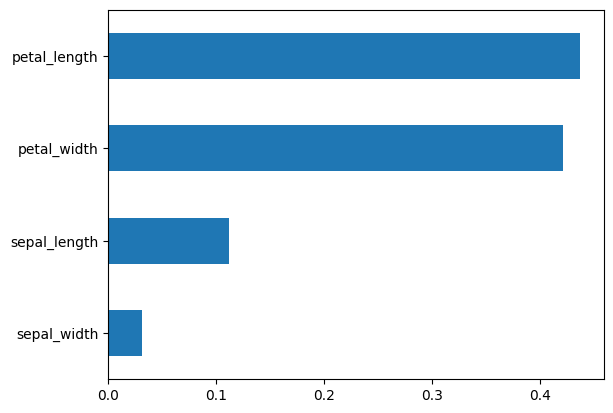

In [ ]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
forest_importances.plot.barh()

As melhores acurácias foram respectivamente das features petal_length, petal_width, sepal_length e sepal_width.

Referência: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel

In [ ]:
selector = SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
selector.fit(X_train_iris, y_train_iris)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
selector.get_support()

array([False, False,  True,  True])

In [ ]:
selector.threshold_

0.25

In [ ]:
#valores selecionados
np.sum(selector.get_support())

2

## Validação Cruzada com k-NN

### Aplique a validação cruzada para as bases de dados utilizadas neste exercício




Utilize o conjunto de dados com todas as features gerados a partir do sklearn. Primeira parte dos exercícios.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#### Dados **gerados com a função do sklearn**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)

scores

array([0.725, 0.67 , 0.73 , 0.77 , 0.715])

A saída array ([0.725, 0.67 , 0.73 , 0.77 , 0.715]) representa as pontuações de acurácia obtidas pelo modelo KNN em cada uma das 5 divisões (folds) durante a validação cruzada. Logo, a segunda divisão foi a que apresentou maior variação da pontuação.

In [ ]:
print(f"A média dos scores é {scores.mean()*100:.2f}%")

A média dos scores é 72.20%


In [ ]:
std_score = scores.std()

print(f'Desvio Padrão: {std_score:.2f}')

Desvio Padrão: 0.03


Isso indica que a média das acurácias é aproximadamente 0.7220 e que a variação entre as pontuações é relativamente baixa (desvio padrão de aproximadamente 0.03). Isso sugere que o modelo KNN tem um desempenho estável nas diferentes divisões da validação cruzada.

Text(0, 0.5, 'Score Rate')

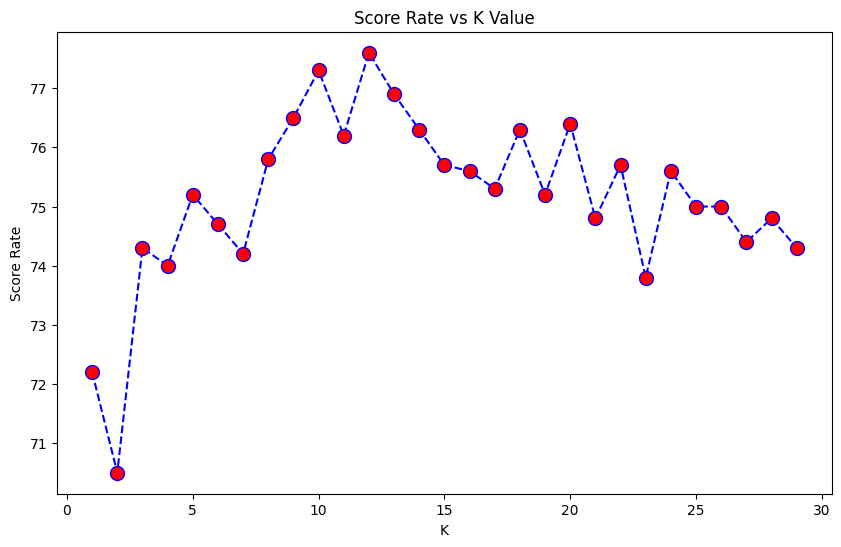

In [ ]:
from sklearn.model_selection import cross_val_score

score = []

for i in range(1,30):
  model = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(model, X, y, cv=5)
  score.append(round((scores.mean()*100), 2))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

In [ ]:
#Com base no gráfico, escolhido k=12
knn_final = KNeighborsClassifier(n_neighbors=12)
knn_final.fit(X_train, y_train)
y_pred_knn_cross_val = knn_final.predict(X_test)

report = classification_report(y_test, y_pred_knn_cross_val)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       127
           1       0.82      0.82      0.82       123

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



O k = 12 foi escolhido porque foi considerado como um "ponto ótimo", onde a acurácia atingiu o pico. Esse é o valor de k que ofereceu o melhor desempenho para o modelo.

Após esse ponto, a acurácia começou a cair, pois o valor de K estava sendo aumentado demais, o que poderia levar a um modelo que não generalizasse bem.

A precisão é a proporção de verdadeiros positivos em relação ao total de previsões positivas feitas. Valores próximos de 1 indicam que o modelo é bom em evitar falsos positivos.

O recall é a proporção de verdadeiros positivos em relação ao total de exemplos que realmente pertencem à classe. Valores próximos de 1 indicam que o modelo é bom em capturar a maioria das instâncias positivas.

O F1-score é a média harmônica da precisão e do recall. É uma boa métrica quando se precisa de um balanço entre precisão e recall, especialmente em casos de classes desbalanceadas.

A acurácia global do modelo é 0.82, ou 82%. Isso indica que o modelo está classificando corretamente 82% dos exemplos.

Portanto, este modelo teve um desempenho com precisão, recall e F1-score em torno de 0.82 a 0.83, o que é tido como bom para o caso em questão.

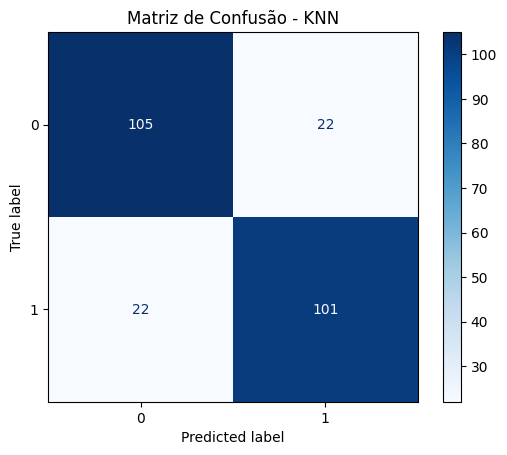

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn_cross_val)

# Criar a visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Adicionar título e exibir o gráfico
plt.title('Matriz de Confusão - KNN')
plt.show()

Os Verdadeiros Positivos (TP) são os casos positivos corretamente previstos. No caso analisado foram 105. Os Verdadeiros Negativos (TN) são os casos negativos corretamente previstos, que foram 101. Portanto, mais de 200 casos foram previstos de forma correta.

Por outro lado, 22 casos foram Falsos Positivos (FP): o número de casos negativos incorretamente previstos como positivos. E mais 22 casos foram Falsos Negativos (FN): o número de casos positivos incorretamente previstos como negativos. Portanto, mais de 40 casos foram previstos de forma incorreta.

Portanto, a acurácia desse modelo foi boa (82%), uma vez que essa métrica de desempenho avalia quão bem o modelo está fazendo previsões. Ela mede a proporção de previsões corretas em relação ao total de previsões feitas.



#### Dados **Iris**

Ponto extra

In [ ]:
# Recarregar o dataset para evitar erro e refazer a análise

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled, y, test_size=0.25, random_state=111)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_scaled, y_encoded, cv = 5)
scores

array([0.93333333, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [ ]:
scores.mean()*100

94.66666666666666

In [ ]:
print(f"A média dos scores é {scores.mean()*100:.2f}%")

A média dos scores é 94.67%


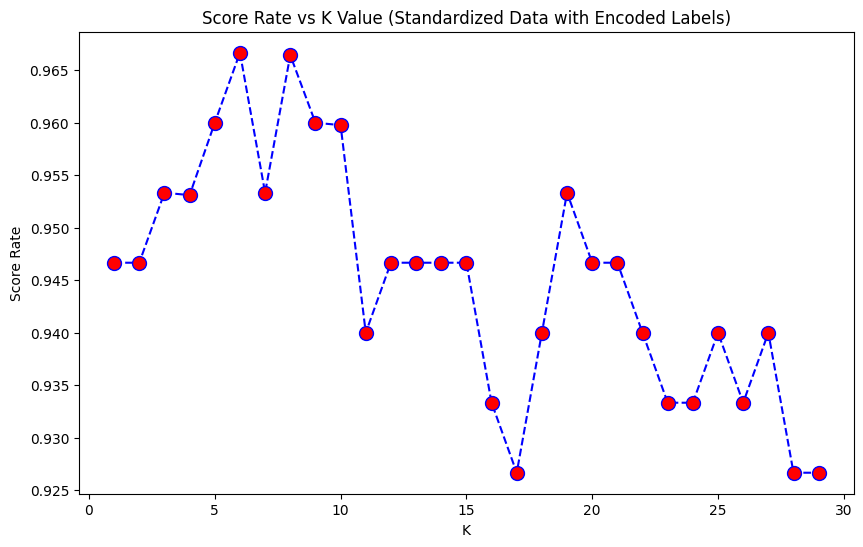

In [ ]:
k_scores_encoded = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_scaled, y_encoded, cv=5)
    k_scores_encoded.append(scores.mean())

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), k_scores_encoded, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score Rate vs K Value (Standardized Data with Encoded Labels)')
plt.xlabel('K')
plt.ylabel('Score Rate')
plt.show()


In [ ]:
#Com base no gráfico, escolhido k=6
knn_final_iris = KNeighborsClassifier(n_neighbors=6)
knn_final_iris.fit(X_train_iris, y_train_iris)
y_pred_knn_cross_val_iris = knn_final_iris.predict(X_test_iris)

report = classification_report(y_test_iris, y_pred_knn_cross_val_iris)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



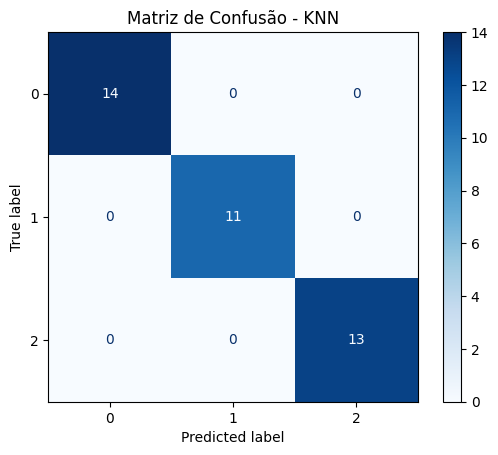

In [ ]:
cm = confusion_matrix(y_test_iris, y_pred_knn_cross_val_iris)

# Criar a visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Adicionar título e exibir o gráfico
plt.title('Matriz de Confusão - KNN')
plt.show()

## Conclusão



As abordagens de pré-processamento (PC), seleção de características (feature selection) e validação cruzada (cross-validation) têm um impacto significativo na construção de modelos de machine learning.

Ao comparar os diferentes modelos, observou-se que a utilização de todas as features resultou no pior desempenho, o que indica que algumas variáveis estavam adicionando ruído ao modelo. A redução de features, seja por PCA (10 ou 5 features) ou por Random Forest mostrou um ganho significativo de performance. Isso mostra a importância de uma seleção de features adequada para evitar sobreajuste e melhorar a eficiência do algoritmo.

O modelo com validação cruzada (K=12) apresentou a melhor performance geral. Indicando que, além da seleção de features, a escolha do número de vizinhos e a aplicação de validação cruzada foram cruciais para obter um modelo mais robusto. A combinação dessas técnicas resultou em um modelo mais simples e com maior acurácia.

Enfim, a validação cruzada permitiu uma avaliação mais robusta da performance do modelo ao usar múltiplos subconjuntos de dados. Também permitiu a redução do overfitting: ajuda a garantir que o modelo generalize bem para dados não vistos.